# Packages required

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import time
import os
import glob
import cv2
import ujson as json
#import json
from collections import OrderedDict
from collections import Counter

import seaborn as sns
import math
import datetime
from collections import defaultdict


In [2]:
## Sklearn stuff
#from sklearn.model_selection import StratifiedKFold
from math import sqrt
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_curve, auc #roc_auc_score as AUC

In [3]:
## Keras stuffs
from keras import __version__ as keras_version
print('Keras version: {}'.format(keras_version))
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Convolution1D, GlobalMaxPooling1D, ZeroPadding1D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD,Adam
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.preprocessing import image
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


Keras version: 1.2.2


In [4]:
## our functions
from ipinyouReader import * #name overlap
import ipinyouWriter
import BidModels
from Evaluator import * #name overlap

# Hyperparams to tune

In [5]:
### Data
TRAIN_FILE_PATH="./data.pruned/train_cleaned_prune.csv" #"../dataset/train.csv"
VALIDATION_FILE_PATH="./data.pruned/validation_cleaned_prune.csv" #"../dataset/validation.csv"
MODEL_CHECKPOINT_FILE_PATH="Keras-CNN-morelayersv3.hdf5"

#Stratification
NUM_K_FOLDS=1
SHUFFLE_INPUT=True
RANDOM_SEED=None #or int

### Weights
CLASS_WEIGHTS_MU=2.2 #0.8 #0.15

### Training
BATCH_SIZE = 64
TOTAL_EPOCHS = 30
DROPOUT_PROB=0.2
LEARNING_RATE=0.0001#adam #for SGD 0.003

### bidding strategy
BASE_PRICE=300

# Load data files

In [6]:
# # Read in train.csv to train the model
#trainReader = ipinyouReader.ipinyouReader(TRAIN_FILE_PATH)
trainReader = ipinyouReader.ipinyouReader(TRAIN_FILE_PATH)
#trainData = trainReader.getTrainData()

# Read in Validation.csv for developmental testing
#validationReader = ipinyouReader.ipinyouReader(VALIDATION_FILE_PATH)
validationReader = ipinyouReader.ipinyouReader(VALIDATION_FILE_PATH)
#validationData = validationReader.getTestData()


In [7]:
validationData = validationReader.getDataFrame()
trainData = trainReader.getDataFrame()

In [8]:
validationData

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,12,5efc19765061bab7f833658e9da87da7,1,u_Vh2r1ATx3vB9DBE,windows_chrome,222.175.103.*,146,147,...,600,2,0,39,e87d7633d474589c2e2e3ba4eda53f6c,300,44,361e128affece850342293213691a043,3386,"10083,10006,14273,10052,10063,10110"
1,0,3,12,22d8368d8bccb7c7bc83db5e6030530b,1,u_Z0phPrCyPtdUXYk,windows_ie,58.222.155.*,80,92,...,600,2,0,5,cb7c76e7784031272e37af8e7e9b062c,300,41,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,13776"
2,0,5,1,7e57cca3cd10664a9cd7645204dc1266,1,u_Vh5zZDBI3tqLFOC,mac_safari,122.194.13.*,80,85,...,90,0,1,0,fa8f0532dd5144b5fa748459e8d90b49,227,17,0f951a030abdaedd733ee8d114ce2944,3427,null
3,0,0,21,4f91e5c406096c473d45b596aaac0736,1,u_VhkYPpq5LQ5cBQc,windows_ie,119.187.242.*,146,151,...,90,0,0,20,832b91d59d0cb5731431653204a76c0e,300,87,bebefa5efe83beee17a3d245e7c5085b,1458,"10076,10063,10006,10059,10111"
4,0,0,21,65ce61fc67e2d1bca7159ba6e34888f0,1,u_DAKAS8FTs1J,windows_chrome,27.46.122.*,216,219,...,250,Na,Na,50,10722,294,260,null,2821,"10057,10059,10684,14273,10077,10006,10024,1011..."
5,0,0,22,91b1ce825f69a6860bffe86d4578c4f9,1,u_VhkR15F-Oep_lWl,windows_chrome,114.241.136.*,1,1,...,90,1,1,0,b90c12ed2bd7950c6027bf9c6937c48a,300,4,361e128affece850342293213691a043,3386,"10063,10059,10006,10111"
6,0,6,9,f79a3d58ea9048990b000ee739ba9e21,1,u_Vhk7C3TkPUjhgQB,windows_ie,110.205.123.*,201,213,...,600,0,0,162,fe222c13e927077ad3ea087a92c0935c,238,182,d29e59bf0f7f8243858b8183f14d4412,3358,null
7,0,0,22,3164a0511505b782f3b90b3f62092acd,1,u_DAHCBd8jugw,windows_chrome,58.242.164.*,106,109,...,90,FirstView,Na,0,10717,294,9,null,2821,null
8,1,6,22,f7ff02cf66d13910fc3edc8574ec8710,1,u_Vhk71eTnDNk83-j,mac_safari,125.107.46.*,94,100,...,250,1,5,0,44966cc8da1ed40c95d59e863c8c75f0,300,115,361e128affece850342293213691a043,3386,null
9,0,0,17,e8a73716d771891e890505110d8b6372,1,u_DALHJ05oti3,windows_chrome,121.33.234.*,216,217,...,250,FirstView,Na,5,7321,277,205,null,2259,null


In [9]:
trainData

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,3,12,bad96e5abbb3edaa07e799147984d052,1,u_VhkxVxf9OTmUQfB,windows_ie,223.241.13.*,106,108,...,90,0,0,50,c46090c887c257b61ab1fa11baee91d8,241,55,0f951a030abdaedd733ee8d114ce2944,3427,10063
1,1,6,7,a373965aa5613d6f8faecb4ebb48d50b,1,u_VhdTOe5PO8zW3sn,windows_chrome,27.152.193.*,124,129,...,90,1,0,5,b90c12ed2bd7950c6027bf9c6937c48a,300,96,361e128affece850342293213691a043,3386,"13776,13800,10024"
2,0,5,0,8fa00639ef7b95b263868e7a93ce81a7,1,u_D1ALUC1ocq6,windows_firefox,113.116.61.*,216,219,...,250,Na,Na,50,7323,294,50,null,2259,"10048,14273,10083,13042,11423,10110,13776,1340..."
3,1,0,7,1711992a95af8ff837ec8e4aadc5f709,1,u_VhkEO3LyPUFLXZa,windows_ie,112.92.74.*,216,220,...,250,0,0,50,e1af08818a6cd6bbba118bb54a651961,254,150,a5d0bde104fea52ea466c77b37948424,3476,"13403,10076,10006,10063,10075,10110"
4,0,1,15,c73e82f75453032c1584cfdd34ec5317,1,u_VhkxPa52PQTVGQk,windows_chrome,218.206.193.*,164,165,...,250,1,0,5,2abc9eaf57d17a96195af3f63c45dc72,300,213,bebefa5efe83beee17a3d245e7c5085b,1458,null
5,0,3,2,83c91f70abc242e7e0a9a5a26a80b26a,1,u_Vhky1AayOtm2JCn,windows_ie,125.83.231.*,275,275,...,600,2,0,5,cb7c76e7784031272e37af8e7e9b062c,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,13776
6,0,0,20,7cb7f6e838bdd770cb66c104f2ed2641,1,u_D8CLGG5pyb5,windows_ie,110.242.73.*,3,9,...,250,SecondView,Na,0,10722,294,238,null,2821,"16751,11278,14273,10083,13776,10110,10138,1340..."
7,0,2,12,d2b0a79b90930cb9314a6f86d397467d,1,u_VhkyC3sELHmZFQL,windows_ie,182.85.146.*,134,135,...,90,1,0,5,b90c12ed2bd7950c6027bf9c6937c48a,300,60,361e128affece850342293213691a043,3386,"10006,13800,10024"
8,0,2,20,ce9a6a293e3c592ed3fecde999f7c8f6,1,u_VhkyLRlIDtcW3Bl,windows_chrome,221.1.97.*,146,153,...,250,1,0,5,449a22cd91d9042eda3d3a1b89a22ea8,238,148,0f951a030abdaedd733ee8d114ce2944,3427,null
9,0,5,9,a8c054432544541c225b240361b1831e,1,u_DA6MUW2yt5X,windows_chrome,123.245.99.*,40,41,...,100,Na,Na,0,12621,294,109,null,2261,"10083,10006,11423,10110,10131,13403,10063"


# Preprocess data

In [10]:
trainOneHotData,trainY = trainReader.getOneHotData()
validationOneHotData,valY = validationReader.getOneHotData(train_cols=trainOneHotData.columns.get_values().tolist())

X_train = np.expand_dims(trainOneHotData.as_matrix(), axis=1)
Y_train = trainY.as_matrix()
X_val = np.expand_dims(validationOneHotData.as_matrix(), axis=1)
Y_val = valY.as_matrix()

In [11]:
print(len(trainOneHotData.columns))
print(len(validationOneHotData.columns))

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

2465
2465
(9930, 1, 2465)
(9930, 3)
(1100, 1, 2465)
(1100, 3)


In [12]:
# for i in trainOneHotData.dtypes:
#     print(i)

# Class Weights

In [13]:
#valY['click'].value_counts()[0]
trainY['click'].unique()

array([0, 1])

In [14]:
# labels_dict : {ind_label: count_label}
# mu : parameter to tune 

def create_class_weight(trainY,mu=CLASS_WEIGHTS_MU):
    total = len(trainY['click'])
    keys = trainY['click'].unique()
    class_weight = dict()
    #print(total)
    
    for key in keys:
        #print(trainY['click'].value_counts()[key])
        score = math.log(mu*total/float(trainY['click'].value_counts()[key]))
        #print(score)
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

train_class_weight=create_class_weight(trainY)
print(train_class_weight)

{0: 1.0116009116784799, 1: 2.3978952727983707}


# Create the model

In [15]:
output_dim = nb_classes = 2
input_dim = len(trainOneHotData.columns)

In [16]:
Y_click_train = to_categorical(Y_train[:,0], nb_classes)
Y_click_val = to_categorical(Y_val[:,0], nb_classes)

In [17]:
#Y_click_train
#Y_train[0,:]

In [18]:
# define model
#model = Sequential()
#model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))


#https://github.com/fchollet/keras/blob/master/examples/imdb_cnn.py
# set parameters:
max_features = 5000 #5000
maxlen = input_dim
embedding_dims = 50
nb_filter = 250
filter_length = 3
hidden_dims = 250

model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
# model.add(Embedding(max_features,
#                     embedding_dims,
#                     input_length=maxlen,
#                     dropout=0.2))
                        
# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:
# model.add(Convolution1D(nb_filter=nb_filter,
#                         filter_length=filter_length,
#                         border_mode='valid',
#                         activation='relu',
#                         subsample_length=1))

#https://keras.io/layers/convolutional/
model.add(Convolution1D(nb_filter=nb_filter, 
                        filter_length=filter_length,
                        border_mode='same',#'valid',
                        activation='relu',
                        input_shape=(1,input_dim),
                       ))


# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.1))
model.add(Activation('relu'))

# # We project onto a single unit output layer, and squash it with a sigmoid:
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))


In [19]:
#optimizer = SGD(lr = LEARNING_RATE, momentum = 0.9, decay = 0.0, nesterov = True)
optimizer=Adam(lr=LEARNING_RATE)

# compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_1 (Convolution1D)  (None, 1, 250)        1849000     convolution1d_input_1[0][0]      
____________________________________________________________________________________________________
globalmaxpooling1d_1 (GlobalMaxP (None, 250)           0           convolution1d_1[0][0]            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 250)           62750       globalmaxpooling1d_1[0][0]       
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 250)           0           dense_1[0][0]                    
___________________________________________________________________________________________

In [21]:
model.get_config()

[{'class_name': 'Convolution1D',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'relu',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'batch_input_shape': (None, 1, 2465),
   'bias': True,
   'border_mode': 'same',
   'filter_length': 3,
   'init': 'glorot_uniform',
   'input_dim': None,
   'input_dtype': 'float32',
   'input_length': None,
   'name': 'convolution1d_1',
   'nb_filter': 250,
   'subsample_length': 1,
   'trainable': True}},
 {'class_name': 'GlobalMaxPooling1D',
  'config': {'name': 'globalmaxpooling1d_1', 'trainable': True}},
 {'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'bias': True,
   'init': 'glorot_uniform',
   'input_dim': 250,
   'name': 'dense_1',
   'output_dim': 250,
   'trainable': True}},
 {'class_name': 'Dropout',
  'config': {'name': 

In [22]:
#'weekday', 'hour', 'useragent split _', 'IP split . first?', 'region', 'city', 
#'adexchange', 'domain', 
#'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
#'slotprice *** should always be smaller than payprice? (but not true), or bidprice -- true', 
#'creative', 'keypage','advertiser', 
#'usertag split ',' into each tag


# y values:
# 'click','bidprice (note relation to slotprice reserve price too)', 'payprice',

# Train the model

In [23]:
#saves the model weights after each epoch if the validation loss decreased
checkpointer = ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILE_PATH, verbose=1, save_best_only=True)

# early stopping one class only
earlystopper = EarlyStopping(monitor='val_loss', patience=2, verbose=0)
# early stopping ht+class
#earlystopper = EarlyStopping(monitor='val_class_loss', patience=2, verbose=0)

# # For both
# history=model.fit(train_data, [train_downsampled_ht, to_categorical(train_target)], \
#           batch_size=BATCH_SIZE, nb_epoch=TOTAL_EPOCHS, 
#           validation_data=(validation_data, [validation_downsampled_ht, to_categorical(validation_target)]),
#           class_weight=train_class_weight,
#           callbacks=[checkpointer,earlystopper]
#          ) #TODO add callbacks, shuffle?

## For click pred only
history=model.fit(X_train, [Y_click_train], \
          batch_size=BATCH_SIZE, nb_epoch=TOTAL_EPOCHS, 
          validation_data=(X_val, [Y_click_val]),
          class_weight=train_class_weight,
          callbacks=[checkpointer,earlystopper]
         ) #TODO add callbacks, shuffle?

Train on 9930 samples, validate on 1100 samples
Epoch 1/30
9930/9930 [==============================] - 2s - loss: 0.7655 - acc: 0.8226 - val_loss: 0.4696 - val_acc: 0.8518
Epoch 2/30
9930/9930 [==============================] - 1s - loss: 0.6122 - acc: 0.8486 - val_loss: 0.3785 - val_acc: 0.8609
Epoch 3/30
9930/9930 [==============================] - 1s - loss: 0.5337 - acc: 0.8556 - val_loss: 0.3684 - val_acc: 0.8555
Epoch 4/30
9930/9930 [==============================] - 1s - loss: 0.4837 - acc: 0.8675 - val_loss: 0.3821 - val_acc: 0.8345
Epoch 5/30
9930/9930 [==============================] - 1s - loss: 0.4446 - acc: 0.8772 - val_loss: 0.3500 - val_acc: 0.8527
Epoch 6/30
9930/9930 [==============================] - 1s - loss: 0.4114 - acc: 0.8858 - val_loss: 0.3648 - val_acc: 0.8455
Epoch 7/30
9930/9930 [==============================] - 1s - loss: 0.3799 - acc: 0.8947 - val_loss: 0.3611 - val_acc: 0.8473
Epoch 8/30
9930/9930 [==============================] - 1s - loss: 0.3462 - a

In [24]:
# history = model.fit(X_train, Y_click_train,
#                     batch_size=BATCH_SIZE, nb_epoch=TOTAL_EPOCHS,
#                     verbose=1, validation_data=(X_val, Y_click_val))
# score = model.evaluate(X_val, Y_click_val, verbose=0)

# print('Test score:', score[0])
# print('Test accuracy:', score[1])


# Load best trained model

In [25]:
def load_trained_model(weights_path):
    #model = create_model()
    model.load_weights(weights_path)

In [26]:
load_trained_model(MODEL_CHECKPOINT_FILE_PATH)

# Make click predictions using model

In [27]:
prob_click_train = model.predict(X_train)
prob_click_val = model.predict(X_val)

In [28]:
#prob_click_val[0:22,1]
#pred_click_val[0:22,1]
#Y_click_val[0:22,1]

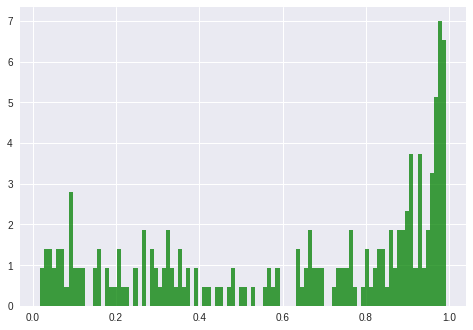

In [29]:
# click=1 prediction as click = =1 probabilities
click1=prob_click_val[Y_click_val[:,1].astype(bool),1]
# the histogram of the data
n, bins, patches = plt.hist(click1, 100, normed=True, facecolor='g', alpha=0.75)
# for item in patches:
#     item.set_height(item.get_height()/sum(n))

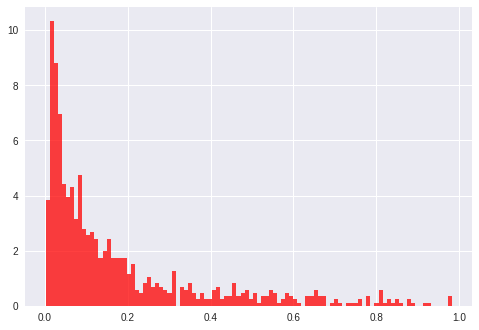

In [30]:
# click=0 prediction as click=1 probabilities
click0=prob_click_val[Y_click_val[:,0].astype(bool),1]
# the histogram of the data
n, bins, patches = plt.hist(click0, 100, normed=True, facecolor='r', alpha=0.75)
# for item in patches:
#     item.set_height(item.get_height()/sum(n))

In [31]:
# # just pick whichever prob is higher as prediction
# pred_click_train=(prob_click_train == prob_click_train.max(axis=1, keepdims=True)).astype(int)
# pred_click_val=(prob_click_val == prob_click_val.max(axis=1, keepdims=True)).astype(int)
# pred_1_click_train=pred_click_train[:,1]
# pred_1_click_val=pred_click_val[:,1]

# Pick pred_threshold for click=1 as click=1
pred_threshold=0.2
pred_1_click_train=np.greater_equal(prob_click_train[:,1],pred_threshold).astype(int)
pred_1_click_val=np.greater_equal(prob_click_val[:,1],pred_threshold).astype(int)

# Gold 
Y_1_click_train =Y_click_train[:,1]
Y_1_click_val =Y_click_val[:,1]



In [32]:
click_eval=ClickEvaluator()

In [33]:
#Train
click_precision,click_recall,click_f1score=\
    click_eval.printClickPredictionScore(y_Pred=pred_1_click_train,y_Gold=Y_1_click_train)

Number of 1 in pred:  3900
Number of 0 in pred:  6030
Number of 1 in gold:  1986
Number of 0 in gold:  7944
Click=0 	Precision\pCTR: 0.982 	Recall: 0.745 	F1: 0.847
Click=1 	Precision\pCTR: 0.481 	Recall: 0.944 	F1: 0.637


In [34]:
#Validation
click_precision,click_recall,click_f1score=\
    click_eval.printClickPredictionScore(y_Pred=pred_1_click_val,y_Gold=Y_1_click_val)

Number of 1 in pred:  423
Number of 0 in pred:  677
Number of 1 in gold:  220
Number of 0 in gold:  880
Click=0 	Precision\pCTR: 0.945 	Recall: 0.727 	F1: 0.822
Click=1 	Precision\pCTR: 0.433 	Recall: 0.832 	F1: 0.569


In [35]:
# Plot data https://vkolachalama.blogspot.co.uk/2016/05/keras-implementation-of-mlp-neural.html
def roc_results_plot(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    
    plt.show()
    print('AUC: %f' % roc_auc)

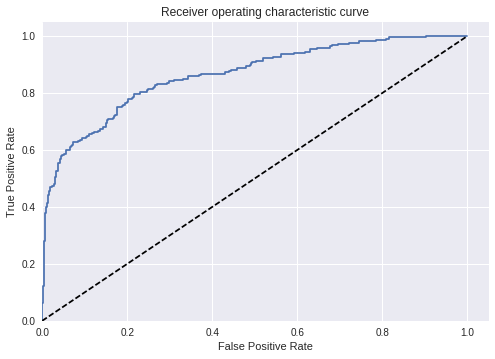

AUC: 0.863941


In [36]:
roc_results_plot(Y_click_val[:,1],prob_click_val[:,1])

# Bid Prediction

In [37]:
def format_bids_output(bids,bidid_pd_dataset):
    bidid_pd_dataset['bidprice']=bids
    return bidid_pd_dataset

In [38]:
def compute_avgCTR(clicks_dataset):
    avgCTR = clicks_dataset.sum()/len(clicks_dataset)
    return avgCTR

In [39]:
def compute_bids(reserve,Y,prob_clicks,pred_clicks,budget,prune_thresh,budget_thresh):
    print('dataset size                   : {}'.format(len(pred_clicks)))
    print('actual budget                  : {}'.format(int(budget)))
    print('budget with overflow {}x       : {}'.format(budget_thresh,int(budget*budget_thresh)))
    avgCTR = compute_avgCTR(pred_clicks)
    print('base price                     : {}'.format(round(BASE_PRICE,1)))
    print('avgCTR                         : {}'.format(round(avgCTR,5)))
    initial_bids = BASE_PRICE*(prob_clicks/avgCTR) #base_price*(pCTR/avgCTR) formula
    #print(initial_bids)
    print('inital bid total               : {}'.format(int(initial_bids.sum())))
    
    ## only bid if we are above min of slotprice
    bids_reserve_price_met=np.ma.masked_less(initial_bids,reserve) # mask out values less than
    np.ma.set_fill_value(bids_reserve_price_met, 0.0)
    #print(bids_reserve_price_met.filled()) # return with filled value i.e masked out values become 0
    print('bid total post-reserve prune   : {}'.format(int(bids_reserve_price_met.filled().sum())))
    
    ## ensure we are below budget too, do crude pruning based on pred prob
    prune_tresh_mask=np.less(prob_clicks,prune_thresh)
    #print(prune_tresh_mask)
    bids_click_thresh_mask=np.ma.masked_array(bids_reserve_price_met.filled(),prune_tresh_mask)
    np.ma.set_fill_value(bids_click_thresh_mask, 0.0)
    #print(bids_click_thresh_mask.filled()) # return with filled value i.e masked out values become 0    
    print('bid total post-prob {} prune  : {}'.format(prune_thresh,int(bids_click_thresh_mask.filled().sum())))    
    
    ## ensure we are below budget too, further pruning until under budget
    bids_ma=bids_click_thresh_mask
    #print(bids_ma.mask)
    #work backwards until we are within budget
    i=-1
    while int(bids_ma.filled().sum()) > budget*budget_thresh:
        #print("{},{},{}".format(i,int(bids_ma.filled().sum()),budget))
        bids_ma.mask[i] = True
        i+=-1
    #print(bids_ma.filled()) # return with filled value i.e masked out values become 0    
    print('bid total backwards {} prune : {}'.format(-i-1,int(bids_ma.filled().sum())))    
    
    return bids_ma.filled().astype(int)

In [40]:
# on Train
print("True Train CTR: {}".format(compute_avgCTR(Y_1_click_train)))
print("Pred Train CTR: {}".format(compute_avgCTR(pred_1_click_train)))

True Train CTR: 0.2
Pred Train CTR: 0.39274924471299094


In [41]:
# on Validation
print("True Validation CTR: {}".format(compute_avgCTR(Y_1_click_val)))
print("Pred Validation CTR: {}".format(compute_avgCTR(pred_1_click_val)))

True Validation CTR: 0.2
Pred Validation CTR: 0.3845454545454545


In [42]:
#prob_click_val[:,1]

In [43]:
### TODO THOUGHTS on improving bid strategy:
# Use the no click distribution mean prob to set prune_tresh?
# base_price considerations = best opt for ratio of pred_click=1 wins?

In [44]:
### Validation set
BASE_PRICE=95#160#150#92#200#100
prune_thresh=0.2#0.15#0.2
budget_thresh=5#2.8
#budget=int(25000*1000/(299749*0.00075))*0.2*1100
budget=int(104.83*220) #this is avg payprice for true click=1
#Training true CTR ratio 0.00075
#0    2695704
#1       2034
#Total 2697738
reserve_val=validationData['slotprice'].as_matrix().astype(int)
bids=compute_bids(reserve_val,Y_val,prob_click_val[:,1],pred_1_click_val,budget,prune_thresh,budget_thresh)
#format bids
bidids_pd_val=validationData[['bidid']].copy()
est_bids_df=format_bids_output(bids,bidids_pd_val)

dataset size                   : 1100
actual budget                  : 23062
budget with overflow 5x       : 115310
base price                     : 95
avgCTR                         : 0.38455
inital bid total               : 72043
bid total post-reserve prune   : 65764
bid total post-prob 0.2 prune  : 57951
bid total backwards 0 prune : 57951


In [45]:
#est_bids_df.shape
#validationData[['bidid']] #5efc19765061bab7f833658e9da87da7
#est_bids_df
#validationData[['bidid','click','payprice']].set_index('bidid').join(est_bids_df.set_index('bidid'))
joinedData=validationData[['bidid','click','payprice']].set_index('bidid').join(est_bids_df.set_index('bidid'))
joinedData[joinedData['click'] == 1 ]
joinedData[(joinedData['bidprice'] >= joinedData['payprice']) & (joinedData['click'] == 1)]

,click,payprice,bidprice
bidid,,,
f7ff02cf66d13910fc3edc8574ec8710,1,115,235
8c811685ec07b3f17c44b1d4d02e40a9,1,6,217
320dd6d01f8004086b239067e4fb8c0c,1,177,227
cff33dddaf9af13a1b1cdfcd74d3b98b,1,103,221
20fbb998ec0af3816ea014e6f6a0ce35,1,84,228
950cfed4b91a271b0fa628221e9b1977,1,140,182
3b2dcb237c771c0a1245538054984efd,1,88,224
fa17cb2c6bde8d0be207d827a5640069,1,160,234
118353129960421c6d0038984d85006c,1,76,242


In [46]:
myEvaluator = Evaluator()
myEvaluator.computePerformanceMetricsDF(budget, est_bids_df, validationData,verbose=True)
myEvaluator.printResult()

#### FLAWED: these didn't account for difference in true CTR due to rebalance of classes
## Unlimited budget
# Metrics compute time: 0.01 seconds
# Trimmed Bids: 0
# Won:  1100
# Click:  220
# CTR:  0.2
# CPM:  87187.2727273
# Spend:  95906
# Average CPC:  435.936363636

## maximise click capture
# dataset size                   : 1100
# actual budget                  : 91743
# budget with overflow 50x       : 4587150
# base price                     : 800
# avgCTR                         : 0.19545
# inital bid total               : 1323993
# bid total post-reserve prune   : 1323935
# bid total post-prob 0.02 prune  : 1322750
# bid total backwards 0 prune : 1322750
# Metrics compute time: 0.01 seconds
# Trimmed Bids: 0
# Won:  1062
# Click:  219
# CTR:  0.206214689266
# CPM:  86059.3220339
# Spend:  91395
# Average CPC:  417.328767123

#### new
# dataset size                   : 1100
# actual budget                  : 104830
# budget with overflow 1.2x       : 125796
# base price                     : 92
# avgCTR                         : 0.19545
# inital bid total               : 152259
# bid total post-reserve prune   : 148268
# bid total post-prob 0.3 prune  : 106980
# bid total backwards 0 prune : 106980
# Metrics compute time: 0.01 seconds
# Trimmed Bids: 0
# Won:  376
# Click:  163
# CTR:  0.433510638298
# CPM:  92194.1489362
# Spend:  34665
# Average CPC:  212.668711656

### new 2
# dataset size                   : 1100
# actual budget                  : 23062
# budget with overflow 2.8x       : 64573
# base price                     : 135
# avgCTR                         : 0.55545
# inital bid total               : 80093
# bid total post-reserve prune   : 72663
# bid total post-prob 0.18 prune  : 64913
# bid total backwards 8 prune : 64569
# Metrics compute time: 0.01 seconds
# Trimmed Bids: 7
# Won:  379
# Click:  139
# CTR:  0.366754617414
# CPM:  60778.3641161
# Spend:  23035
# Average CPC:  165.71942446

Metrics compute time: 0.0 seconds
Trimmed Bids: 0
Won:  285
Click:  144
CTR:  0.505263157895
CPM:  71922.8070175
Spend:  20498
Average CPC:  142.347222222


In [47]:
# myEvaluator = Evaluator()
# myEvaluator.computePerformanceMetricsDF(budget, est_bids_df, validationData)
# myEvaluator.printResult()

In [48]:
myEvaluator.resultDict

{'click': 144, 'spend': 20498, 'trimmed_bids': 0, 'won': 285}